In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpl

In [2]:
columns = ["date-time", "open", "high", "low", "close", "volume"]
df = pd.read_csv("../tests/data/EURUSD_5 Mins_Ask_2023.01.02_2024.02.02.csv", 
                 names=columns, parse_dates=True, 
                 index_col="date-time",
                 header=0)

In [3]:
FROM = 500
PERIODS = 100
TO = FROM + PERIODS

## Plot Data

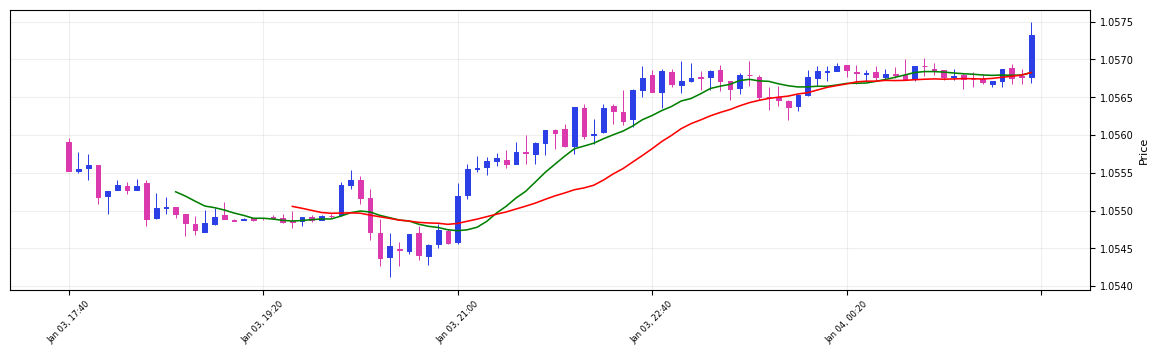

In [4]:
mpl.plot(df[FROM:TO], type="candle", figsize=(15,4), mav=(12,24), style="ibd")

## Calculate Entry Signal

In [5]:
# calculate entry signal
df["mva-12"] = df["close"].rolling(12).mean().round(5)
df["mva-24"] = df["close"].rolling(24).mean().round(5)
mask_signal = (df["mva-12"] > df["mva-24"]) & (df["mva-12"].shift(1) <= df["mva-24"].shift(1)) & (df["close"]> df["open"])
df.loc[mask_signal, "signal"] = 1
df["entry"] = df["signal"].shift(1)


In [6]:
mask_entry = df["entry"] == 1
df.loc[mask_entry, "entry-mark"] = df["low"] - 3/10000

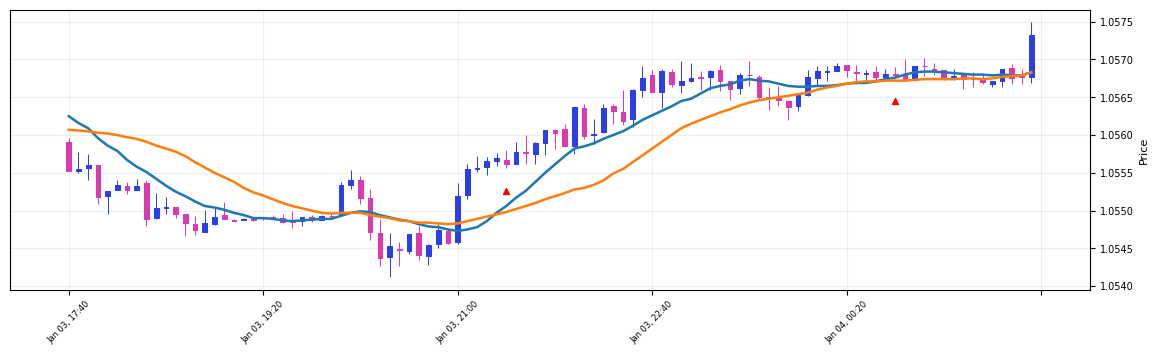

In [7]:
plots = [
    mpl.make_addplot(df[FROM:TO]["mva-12"]),
    mpl.make_addplot(df[FROM:TO]["mva-24"]),
    mpl.make_addplot(df[FROM:TO]["entry-mark"], type="scatter", marker="^", color="red")
]
mpl.plot(df[FROM:TO], type="candle", figsize=(15,4), style="ibd", addplot=plots )

In [8]:
df.head()

,open,high,low,close,volume,mva-12,mva-24,signal,entry,entry-mark
date-time,,,,,,,,,,
2023-01-02 00:00:00,1.07005,1.07013,1.06985,1.06986,136.06,NaN,NaN,NaN,NaN,NaN
2023-01-02 00:05:00,1.06986,1.06991,1.06980,1.06981,66.84,NaN,NaN,NaN,NaN,NaN
2023-01-02 00:10:00,1.07009,1.07011,1.06976,1.06986,118.38,NaN,NaN,NaN,NaN,NaN
2023-01-02 00:15:00,1.06986,1.07012,1.06985,1.06986,117.64,NaN,NaN,NaN,NaN,NaN
2023-01-02 00:20:00,1.06986,1.07014,1.06985,1.07011,141.48,NaN,NaN,NaN,NaN,NaN


In [22]:
entry_mark = df["entry"] == 1
df_entry = df[entry_mark].copy(deep=True)
df_entry.head(10)

,open,high,low,close,volume,mva-12,mva-24,signal,entry,entry-mark,temp-date-time,time-limit,stop-loss-hit-mark,take-profit-hit-mark
date-time,,,,,,,,,,,,,,
2023-01-02 08:05:00,1.06856,1.06857,1.06836,1.06843,97.11,1.06834,1.06828,NaN,1.0,1.06806,2023-01-02 08:05:00,2023-01-02 08:55:00,NaN,NaN
2023-01-02 20:45:00,1.06709,1.06718,1.06692,1.06716,725.66,1.06685,1.06681,NaN,1.0,1.06662,2023-01-02 20:45:00,2023-01-02 21:35:00,NaN,NaN
2023-01-02 23:50:00,1.06747,1.06781,1.06740,1.06755,826.49,1.06666,1.06638,NaN,1.0,1.06710,2023-01-02 23:50:00,2023-01-03 00:40:00,NaN,NaN
2023-01-03 14:45:00,1.05485,1.05494,1.05404,1.05409,1528.09,1.05528,1.05514,NaN,1.0,1.05374,2023-01-03 14:45:00,2023-01-03 15:35:00,NaN,NaN
2023-01-03 21:25:00,1.05567,1.05580,1.05556,1.05561,180.56,1.05506,1.05498,NaN,1.0,1.05526,2023-01-03 21:25:00,2023-01-03 22:15:00,NaN,NaN
2023-01-04 00:45:00,1.05681,1.05690,1.05675,1.05680,758.55,1.05676,1.05672,NaN,1.0,1.05645,2023-01-04 00:45:00,2023-01-04 01:35:00,NaN,NaN
2023-01-04 02:05:00,1.05748,1.05786,1.05745,1.05762,725.51,1.05694,1.05689,NaN,1.0,1.05715,2023-01-04 02:05:00,2023-01-04 02:55:00,NaN,NaN
2023-01-04 04:05:00,1.05714,1.05794,1.05709,1.05787,2194.05,1.05706,1.05698,NaN,1.0,1.05679,2023-01-04 04:05:00,2023-01-04 04:55:00,NaN,NaN
2023-01-04 07:10:00,1.06129,1.06163,1.06129,1.06156,1230.35,1.06184,1.06173,NaN,1.0,1.06099,2023-01-04 07:10:00,2023-01-04 08:00:00,NaN,NaN


In [25]:
ENTRY_DATE= "2023-01-02 23:50:00"

## Plot triple Barrier

In [26]:
from datetime import timedelta

In [27]:
def plot_triple_barrier(ohlc_dataset: pd.DataFrame, 
                        entry_period: str, 
                        take_profit_width: float,
                        stop_loss_width: float,
                        time_barrier: int,
                        dymamic_barrier: object = None
                        ):

    date_from = pd.to_datetime(entry_period)
    date_to = ohlc_dataset[entry_period:].index[50]

    print("Plotting barrier for", len(ohlc_dataset[date_from: date_to]))

    if len(ohlc_dataset[date_from: date_to]) == 0:
        raise ValueError("No data to process")

    open_price = ohlc_dataset.loc[date_from]["open"]
    stop_loss = open_price - stop_loss_width/10000
    take_profit = open_price + take_profit_width/10000

    ohlc_dataset["temp-date-time"] = ohlc_dataset.index
    ohlc_dataset["time-limit"] = ohlc_dataset["temp-date-time"].shift(-time_barrier)
    time_limit = df.loc[date_from]["time-limit"]

    print("Open price", open_price)
    print("Take profit", take_profit)
    print("Stop loss", stop_loss)
    print("Time barrier", time_limit)


    plots = [
    mpl.make_addplot(ohlc_dataset[date_from: date_to]["mva-12"],label="mva-12"),
    mpl.make_addplot(ohlc_dataset[date_from: date_to]["mva-24"],label="mva-24"),
    mpl.make_addplot(ohlc_dataset[date_from: date_to]["entry-mark"], type="scatter", marker="^", color="red")
    ]   

    barrier_points = [
                      (date_from, take_profit),(time_limit, take_profit),
                       (time_limit, stop_loss),(date_from, stop_loss),
                       (date_from, stop_loss),(date_from, take_profit),
                      ]
    

    alines = dict(alines=barrier_points, linewidths=[0.5], colors=["r", "g"], linestyle=["-.", "-."], alpha=0.5)

    if "stop-loss-hit-mark" in ohlc_dataset.columns:
        count_not_null = ohlc_dataset[date_from: date_to]["stop-loss-hit-mark"].count()
        if count_not_null != 0:
            plots.append(mpl.make_addplot(ohlc_dataset[date_from: date_to]["stop-loss-hit-mark"], type="scatter", marker="*", color="blue"))
    if "take-profit-hit-mark" in ohlc_dataset.columns:
        count_not_null = ohlc_dataset[date_from: date_to]["take-profit-hit-mark"].count()
        if count_not_null != 0:
            print("fall here")
            plots.append(mpl.make_addplot(ohlc_dataset[date_from: date_to]["take-profit-hit-mark"], type="scatter", marker="*", color="yellow"))
            
    if "condition-hit-mark" in ohlc_dataset.columns:
        count_not_null = ohlc_dataset[date_from: date_to]["condition-hit-mark"].count()
        if count_not_null != 0:
            plots.append(mpl.make_addplot(ohlc_dataset[date_from: date_to]["condition-hit-mark"], type="scatter", marker="8", color="yellow"))

    mpl.plot(ohlc_dataset[date_from:date_to], 
             type="candle", figsize=(15,4), 
             style="ibd", 
             alines = alines,
             addplot=plots )
    
    plt.show()

Plotting barrier for 51
Open price 1.06747
Take profit 1.0684699999999998
Stop loss 1.06697
Time barrier 2023-01-03 00:40:00


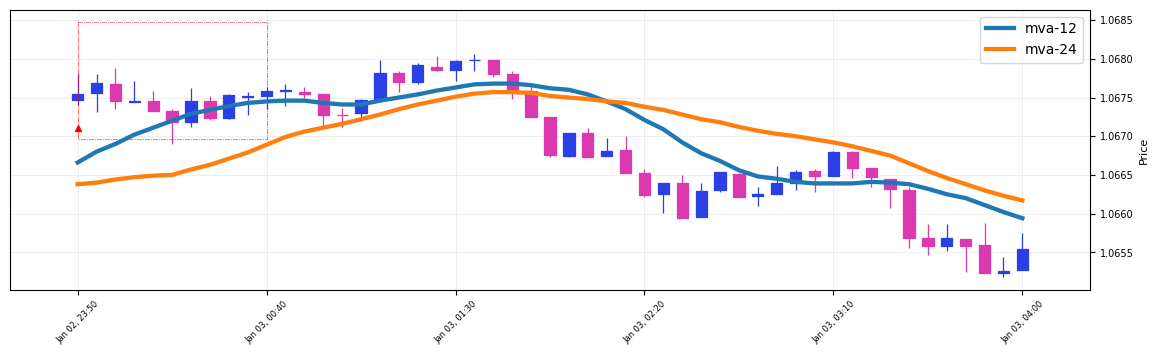

In [28]:
# calculate stop loss / take profit / vertical barrier
take_profit_width = 10  # pips
stop_loss_width = 5  # pips
time_barrier = 10  # periods
plot_triple_barrier(df,ENTRY_DATE, take_profit_width, stop_loss_width, time_barrier, None)

## Claculate Stop Loss Touch

In [14]:
def calculate_next_stop_loss_hit(price, from_date, level, direction) -> dict:
    price_trade_space = price[from_date:]

    if direction == "buy":
        mask_level_hit =  price_trade_space["low"] < level
    else:
        mask_level_hit =  price_trade_space["high"] > level
    return price_trade_space[mask_level_hit].index[0]


Plotting barrier for 51
Open price 1.06747
Take profit 1.0684699999999998
Stop loss 1.06697
Time barrier 2023-01-03 00:40:00


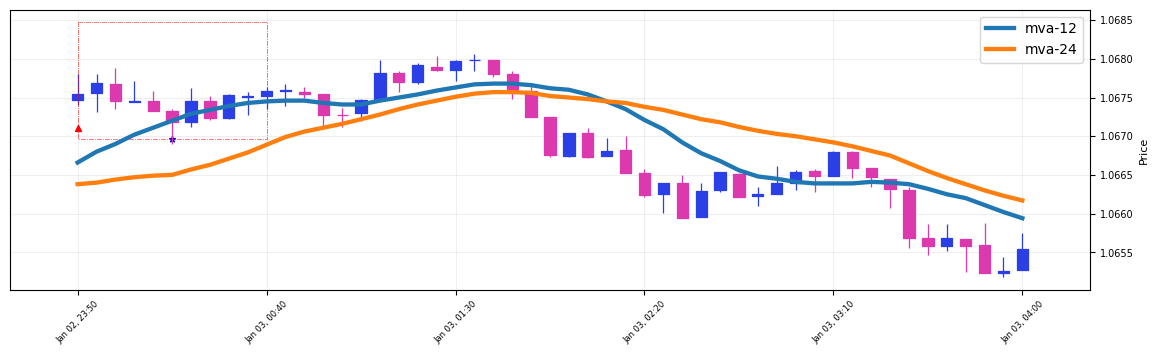

Stop loss hit date 2023-01-03 00:15:00


In [30]:
entry_date = "2023-01-02 23:50:00"
sl = df.loc[entry_date]["open"] - 5/10000
sl_hit_datetime = calculate_next_stop_loss_hit(df, entry_date, sl, "buy")
df.loc[sl_hit_datetime, "stop-loss-hit-mark"]  = sl
plot_triple_barrier(df, entry_date , take_profit_width, stop_loss_width, time_barrier, None)
print("Stop loss hit date",sl_hit_datetime)

## Claculate Take Profit Hit

In [16]:

def calculate_next_take_profit_hit(price, from_date, level, direction) -> dict:
    price_trade_space = price[from_date:]

    if direction == "buy":
        mask_level_hit =  price_trade_space["high"] > level
    else:
        mask_level_hit =  price_trade_space["low"] < level

    return price_trade_space[mask_level_hit].index[0]


In [17]:
df.head()

,open,high,low,close,volume,mva-12,mva-24,signal,entry,entry-mark,temp-date-time,time-limit,stop-loss-hit-mark
date-time,,,,,,,,,,,,,
2023-01-02 00:00:00,1.07005,1.07013,1.06985,1.06986,136.06,NaN,NaN,NaN,NaN,NaN,2023-01-02 00:00:00,2023-01-02 00:50:00,NaN
2023-01-02 00:05:00,1.06986,1.06991,1.06980,1.06981,66.84,NaN,NaN,NaN,NaN,NaN,2023-01-02 00:05:00,2023-01-02 00:55:00,NaN
2023-01-02 00:10:00,1.07009,1.07011,1.06976,1.06986,118.38,NaN,NaN,NaN,NaN,NaN,2023-01-02 00:10:00,2023-01-02 01:00:00,NaN
2023-01-02 00:15:00,1.06986,1.07012,1.06985,1.06986,117.64,NaN,NaN,NaN,NaN,NaN,2023-01-02 00:15:00,2023-01-02 01:05:00,NaN
2023-01-02 00:20:00,1.06986,1.07014,1.06985,1.07011,141.48,NaN,NaN,NaN,NaN,NaN,2023-01-02 00:20:00,2023-01-02 01:10:00,NaN


Plotting barrier for 51
Open price 1.06709
Take profit 1.06759
Stop loss 1.0665900000000001
Time barrier 2023-01-02 21:35:00
fall here


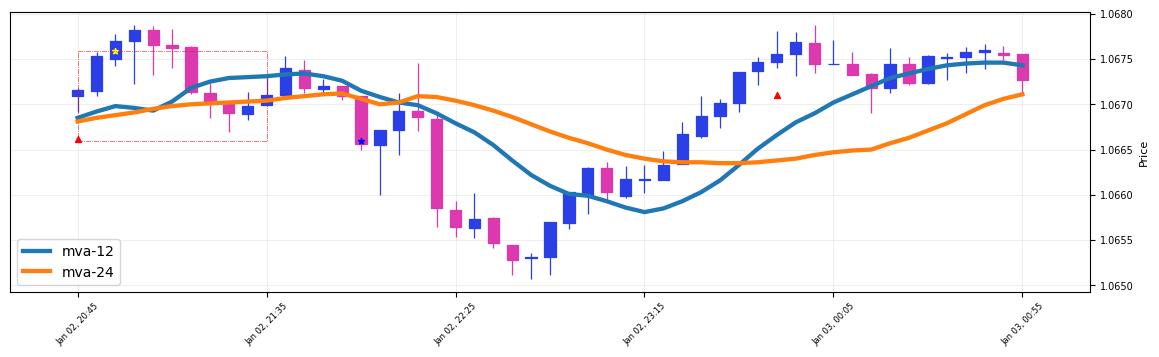

Take profit hit date 2023-01-02 20:55:00


In [18]:
entry_date = "2023-01-02 20:45:00"

take_profit_width = 5
stop_loss_width = 5
sl = df.loc[entry_date]["open"] - stop_loss_width/10000
tp = df.loc[entry_date]["open"] + take_profit_width/10000

sl_hit_datetime = calculate_next_stop_loss_hit(df, entry_date, sl, "buy")
tp_hit_datetime = calculate_next_take_profit_hit(df, entry_date, tp, "buy")

df.loc[sl_hit_datetime, "stop-loss-hit-mark"]  = sl
df.loc[tp_hit_datetime, "take-profit-hit-mark"]  = tp

plot_triple_barrier(df, entry_date, take_profit_width, stop_loss_width, time_barrier, None)
print("Take profit hit date", tp_hit_datetime)

## Calculate Dynamic Hit

In [19]:

def calculate_next_condition_hit(price, from_date, direction) -> dict:
    price_trade_space = price[from_date:]

    if direction == "buy":
        mask_condition_hit =  (price_trade_space["mva-24"].shift(1) > price_trade_space["mva-12"].shift(1)) &  (price_trade_space["mva-24"] < price_trade_space["mva-12"])
    else:
        mask_condition_hit =  (price_trade_space["mva-24"].shift(1) < price_trade_space["mva-12"].shift(1)) &  (price_trade_space["mva-24"] > price_trade_space["mva-12"])

    return price_trade_space[mask_condition_hit].index[0]


In [20]:


take_profit_width = 10
stop_loss_width = 5
sl = df.loc[entry_date]["open"] - stop_loss_width/10000
tp = df.loc[entry_date]["open"] + take_profit_width/10000

sl_hit_datetime = calculate_next_stop_loss_hit(df, entry_date, sl, "buy")
tp_hit_datetime = calculate_next_take_profit_hit(df, entry_date, tp, "buy")
cd_hit_datetime = calculate_next_condition_hit(df, entry_date, "buy")

print("tp_hist_datetime", tp_hist_datetime)

df.loc[sl_hit_datetime, "stop-loss-hit-mark"]  = sl
df.loc[tp_hit_datetime, "take-profit-hit-mark"]  = tp
df.loc[cd_hit_datetime, "condition-hit-mark"]  = df.loc[cd_hit_datetime]["high"] + 3/10000

plot_triple_barrier(df, ENTRY_DATE, take_profit_width, stop_loss_width, time_barrier, None)

NameError: name 'tp_hist_datetime' is not defined